# 6 - REINFORCEMENT LEARNING

## 6.1 - Multi Armed Bandit Problem and Upper Confidence Bound

Reinforcement Learning is a method to teach a machine to perform task by providing positive feedback for actions performed correctly. The Multi armed Bandit problem is the following:

Let's consider a slot machine with a lever which we need to pull in order to play. Say there are a set of such machines under the assumption that each of these machine has a distribution that allows the machine to pick the numbers. We have 5 machines and possibily there are 5 distributions. And wee need to decide which of these slot machine is the best for us.

Formally:

1 - We have $d$ arms, say ads, that we display to users when they connect to a web page

2-  Each user conncetion makes a 'round of game'

3- at each round we display only one ad

4- If the user clicks on the ad $\rightarrow$ we get the reward 1 otherwise we get the reward 0

5- Goal is to maximise the number of rewards

Upper bound confidence works as follows:

1- At each round $n$ for each ad $i$ there are two numbers associated: $N_i(n)$ the number of times the ad $i$ was selected up to round $n$, and $R_i(n)$ the sum of rewards up to round $n$ for ad $i$

2 - we can compute then 
$$ <r_i(n)> = \frac{R_i(n)}{N_i(n)} $$ 
the average reward and the confidence interval $\Delta_i(n)$
$$ \Delta_i(n) = \sqrt{ \frac{3 \log(n)}{2 N_i(n)} } $$

3 - we select the $i$ that has the highest sum $<r_i(n)> + \Delta_i(n)$




In [2]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn; seaborn.set()

In [9]:
dataset = pd.read_csv('Part 6 - Reinforcement Learning/Section 32 - Upper Confidence Bound (UCB)/Ads_CTR_Optimisation.csv') #name of the dataset

# the data set here is a simulation -> each row represents a user and the 1s in the row are the ads on which the user WOULD click. We want to determine as fast as possible the ads with the best ctr

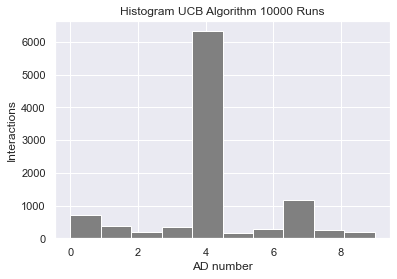

In [34]:
#implementation of the UCB algorithm
import math
ranges = [100, 200, 500, 1000, 2000, 3000, 5000, 7000, 8000, 9000, 10000]
for rounds in ranges:
    num_of_slection = [0]*d #intialize a list of 10 0s
    sums_of_rewards = [0]*d
    avg_reward = 0
    tot_reward = 0
    d = 10
    N = rounds
    ads_selected=[]

    for i in range(0,N,1):
        ad = 0
        max_UCB = 0
        for j in range(0,d):
            if(num_of_slection[j] != 0):
                avg_reward =  sums_of_rewards[j]/num_of_slection[j]
                delta = math.sqrt(3/2 * math.log(i+1)/ num_of_slection[j])
                UCB = avg_reward + delta
            else:
                UCB = 1e400 #force selection of the ad
            if(UCB > max_UCB):
                max_UCB =UCB
                ad = j
        ads_selected.append(ad)
        num_of_slection[ad] += 1
        reward = dataset.values[i,ad]
        sums_of_rewards[ad] += reward
        tot_reward += reward

    plt.hist(ads_selected, color='grey')
    plt.xlabel('AD number')
    plt.ylabel('Interactions')
    plt.title('Histogram UCB Algorithm ' + str(rounds) + ' Runs')
    plt.tight_layout
    plt.savefig('Part 6 - Reinforcement Learning/Section 32 - Upper Confidence Bound (UCB)/HIST_'+str(rounds)+'.jpg', dpi=199)
        

## 6.2 - Thompson Sampling

It is another method for solving the multiarm bandit problem. 

1- The idea is that ad $i$ gets rewarded with reward $y$ from a Bernoulli Distributon $p(y|x)$ where $x$ is set to be uniformly distributed between 0 and 1.

2- We then compute the bayes rule $p(x|y)$
$$
    p(x|y) = \frac{p(y|x) p(x)}{\int p(y|x)p(x)dx} \times p(y|x) \times p(x)
$$

3- We obtain $p(x|y)$

4- At every round we take a random $x(n)$

5- We select the ad that has the highest x(n)

The intuition can be schematised as following. Lets visualise the return of the ad on a graph on the trial rounds for each Ad. THompson algorithm build a distribution associated to those trial rounds. this distribution describes where we THINK the expected return of the machine will be. We are not guessing what the distribution are, and how they are.

The algortihm does the following: it triggers each distribution (extract a value from each distrubution it has built) and creates a bandit configuration $\rightarrow$ makes a simulation extracting the return from the normal distribution it has built. After that adds another data point and updates its set of gaussian curves associated to each ad. And then it restarts. It plays a series of round and build each and everytime a sharper curve, for the distrubution.

The big difference within this and the UCB model is that this is a probabilistic algorithm. It is a huge advantage since the algorothm does not have to be updated all the time


The actual implementation of the Thompson Algorithm can be done as follows:

1- At each round of our game we consider two numbers: 

$N_i^1(n)$ - the number of times ad $i$ got a reward up to round $n$

$N_i^0(n)$ - the number of times ad $i$ did not get a reward up to round $n$

2 - for each $i$ we take a random draw from the $\beta$ distribution:
$$
x(n) = \beta(N_i^1(n) +1 , N_i^0(n)+1)
$$

3 - we select the $i$ associated with the highest $x$,


In [3]:
dataset = pd.read_csv('Part 6 - Reinforcement Learning/Section 33 - Thompson Sampling/Ads_CTR_Optimisation.csv') #name of the dataset

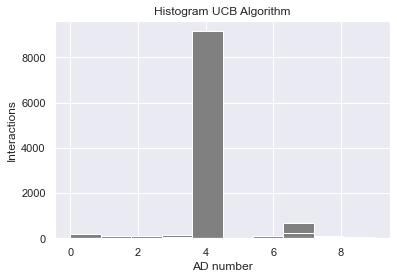

In [4]:
import random

ranges = [100, 200, 500, 1000, 2000, 3000, 5000, 7000, 8000, 9000, 10000]
for rounds in ranges:
    d = 10
    N = rounds
    ads_selected=[]
    num_rew_1 = [0]*d
    num_rew_0 = [0]*d
    tot_reward = 0

    for n in range(0, rounds):
        ad = 0
        max_theta=0
        for i in range(0,d):
            theta= random.betavariate(num_rew_1[i]+1, num_rew_0[i]+1)
            if(theta > max_theta):
                max_theta = theta
                ad = i
        ads_selected.append(ad)
        reward = dataset.values[n, ad]
        if(reward==1):
            num_rew_1[ad]+=1
        else:
            num_rew_0[ad]+=1
        tot_reward+=reward

    plt.hist(ads_selected, color='grey')
    plt.xlabel('AD number')
    plt.ylabel('Interactions')
    plt.title('Histogram UCB Algorithm')
    plt.tight_layout
    plt.savefig('Part 6 - Reinforcement Learning/Section 33 - Thompson Sampling/Thompson_'+str(rounds)+'.jpg')